# Collaborative Filtering - Amazon Digital Music
Dane Hamlett, UC Davis MSBA '18

<p id="toc"></p>
## Table of Contents

   - <a href="#one">Introduction</a>
   - <a href="#two">Import Libraries</a>
   - <a href="#three">Import Data</a>
   - <a href="#four">Explore Data</a>
   - <a href="#five">Build Recomendation Model & Validate Results</a>

<hr style="width:50%;">
## <a id="one">Introduction</a>
<p><a href="#toc">Jump to top</a></p>
<br>
Collaborative filtering is one of the most powerful approaches to recomendation modeling. Collaborative filtering (CF) has also been referred to as social filtering, as the primary intent of the model is to filter information by the recommendations of other people.

CF is based on the premise that people who have agreed on their evalations of specific items in the past, will most likely repeat that behavior in the future.  If someone asks for a recommendation for let's say a certain song, recommendations from close friends are often more likely to be taken into consideration than recommendations from an unknown source.

In essence, CF predicts items based on the history of ratings that a specific user has given and the history of ratings given to a specific item.

This analysis will aim to apply CF to an Amazon Digital Music ratings data set, to predict item ratings.

<strong>References:</strong>
- <a href="http://recommender-systems.org/collaborative-filtering/" target="_blank">Recommender Systems - Collaborative Filterng</a>
- <a href="https://medium.com/@m_n_malaeb/the-easy-guide-for-building-python-collaborative-filtering-recommendation-system-in-2017-d2736d2e92a8" target="_blank">The easy guide for building python collaborative filtering recommendation system</a>
- <a href="https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d" target="_blank">MAE and RMSE — Which Metric is Better?</a>
- <a href="http://surpriselib.com/" target="_blank">Surprise | A Python scikit for recommender systems.</a>
- <a href="http://jmcauley.ucsd.edu/data/amazon/" target="_blank">Amazon product data</a>

<hr style="width:50%;">
## <a id="two">Import Libraries</a>
<p><a href="#toc">Jump to top</a></p>

In [113]:
import pandas as pd
import warnings
from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization specifications
color = sns.color_palette()
plt.style.use('ggplot')
%matplotlib inline

# Warning message supression
warnings.simplefilter("ignore")

<hr style="width:50%;">
## <a id="three">Import Data</a>
<p><a href="#toc">Jump to top</a></p>

In [114]:
# Digital music data set - http://jmcauley.ucsd.edu/data/amazon/
# Ratings only: These datasets include no metadata or reviews, but only (user,item,rating,timestamp) tuples. Thus they are suitable for use with mymedialite (or similar) packages.
# Loading data into the surprise library from pandas
songs = pd.read_csv("http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/ratings_Digital_Music.csv",header=None)
songs.columns = ['userID', 'itemID', 'rating', 'timestamp']
songs.head()

,userID,itemID,rating,timestamp
0,A2EFCYXHNK06IS,5555991584,5.0,978480000
1,A1WR23ER5HMAA9,5555991584,5.0,953424000
2,A2IR4Q0GPAFJKW,5555991584,4.0,1393545600
3,A2V0KUVAB9HSYO,5555991584,4.0,966124800
4,A1J0GL9HCA7ELW,5555991584,5.0,1007683200


<hr style="width:50%;">
## <a id="four">Explore Data</a>
<p><a href="#toc">Jump to top</a></p>

In [115]:
songs.count()

userID       836006
itemID       836006
rating       836006
timestamp    836006
dtype: int64

In [116]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836006 entries, 0 to 836005
Data columns (total 4 columns):
userID       836006 non-null object
itemID       836006 non-null object
rating       836006 non-null float64
timestamp    836006 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 25.5+ MB


In [117]:
songs.describe()

,rating,timestamp
count,836006.000000,8.360060e+05
mean,4.540250,1.296114e+09
std,0.958877,1.269207e+08
min,1.000000,8.852544e+08
25%,4.000000,1.244938e+09
50%,5.000000,1.358294e+09
75%,5.000000,1.381190e+09
max,5.000000,1.406074e+09


In [118]:
# Confirm range of rating values
songs.rating.unique()

array([ 5.,  4.,  3.,  1.,  2.])

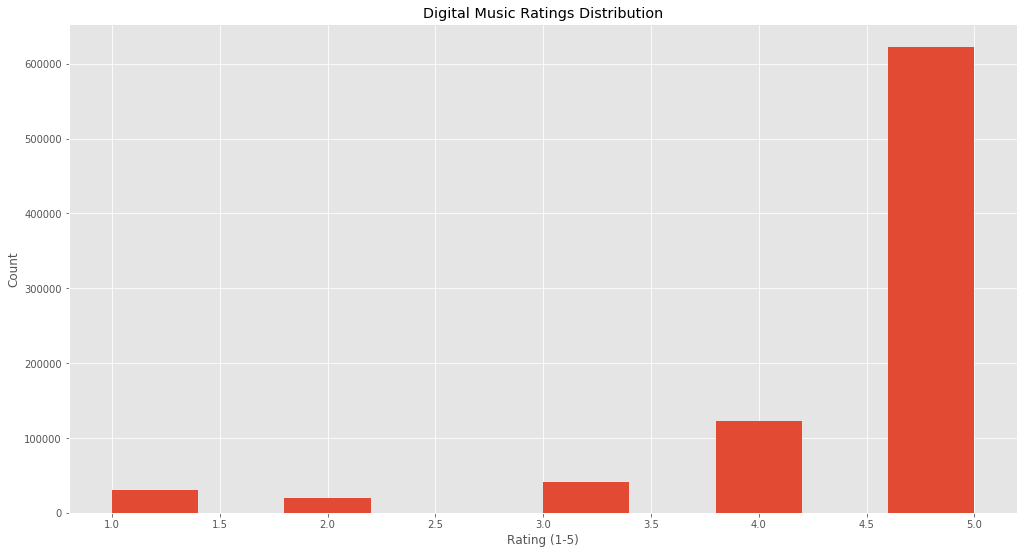

In [119]:
# Create a subset to analyze and confirm the distribution of the data
df_histi = songs[['rating']].copy()
pd.DataFrame.hist(df_histi, figsize = [17,9])
plt.title('Digital Music Ratings Distribution')
plt.xlabel('Rating (1-5)')
plt.ylabel('Count')
plt.show()

<hr style="width:50%;">
## <a id="five">Build Recomendation Model & Validate Results</a>
<p><a href="#toc">Jump to top</a></p>

In [120]:
# Create a test data frame with a sample of 30 rows 
# songs_sample = songs.head(30)

# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(songs[['userID', 'itemID', 'rating']], reader)

# We can now use this dataset as we please, e.g. calling cross_validate
# cross_validate(NormalPredictor(), data, cv=2)

We will leverage the Singular Value Decomposition algorithm, to keep this exercise simple. We will also avoid leveraging any custom parameters. For this exercise we will split the data into 10 folds to train the algorithm.

In [121]:
# Split the dataset into 10 folds and choose the algorithm
data.split(n_folds=10)
algo = SVD()

# Train and test reporting the RMSE and MAE scores
evaluate(algo, data, measures=['RMSE', 'MAE'])

# Retrieve the trainset.
trainset = data.build_full_trainset()
algo.fit(trainset)

Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 0.8824
MAE:  0.6066
------------
Fold 2
RMSE: 0.8869
MAE:  0.6096
------------
Fold 3
RMSE: 0.8806
MAE:  0.6077
------------
Fold 4
RMSE: 0.8853
MAE:  0.6095
------------
Fold 5
RMSE: 0.8844
MAE:  0.6102
------------
Fold 6
RMSE: 0.8784
MAE:  0.6054
------------
Fold 7
RMSE: 0.8814
MAE:  0.6076
------------
Fold 8
RMSE: 0.8885
MAE:  0.6095
------------
Fold 9
RMSE: 0.8871
MAE:  0.6098
------------
Fold 10
RMSE: 0.8871
MAE:  0.6099
------------
------------
Mean RMSE: 0.8842
Mean MAE : 0.6086
------------
------------


Now that the algorithm has been trained, let's generate some predictions.

In [127]:
# Let's sample the model
for index, row in songs.tail(10).iterrows():
    print(algo.predict(row['userID'], row['itemID'], row['rating']))

user: A3HJS000P7AC0Q item: B00LTFDZXE r_ui = 5.00   est = 4.74   {'was_impossible': False}
user: A1BSP3G2B7UNBK item: B00LTL4VGI r_ui = 5.00   est = 4.70   {'was_impossible': False}
user: A3LV9NGAOMV9NN item: B00LWCRAQ2 r_ui = 5.00   est = 4.75   {'was_impossible': False}
user: A1QP5WSKUYZUMG item: B00LWJDZHI r_ui = 5.00   est = 4.93   {'was_impossible': False}
user: A3LWJETAAAD4OU item: B00LWJDZHI r_ui = 5.00   est = 4.93   {'was_impossible': False}
user: A38NRGVVEF3950 item: B00LWJDZHI r_ui = 5.00   est = 4.84   {'was_impossible': False}
user: A36ZEAXJ5HMQXA item: B00LWJDZHI r_ui = 5.00   est = 4.84   {'was_impossible': False}
user: A1840L5R4OPDE4 item: B00LWJDZHI r_ui = 5.00   est = 4.83   {'was_impossible': False}
user: A1HGHLLGGGAQZX item: B00LWJDZHI r_ui = 5.00   est = 4.83   {'was_impossible': False}
user: A2SWE776KGEYPI item: B00LWJDZHI r_ui = 5.00   est = 4.84   {'was_impossible': False}


As we can see above, we have generated predictions that are fairly close to the actual ratings. We have leveraged Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) as metrics to assess overall accuracy of the algorithm. MAE specifically measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight. While MAE may be minimized via algorithm tuning, we should be satisfied with the initial results.

In [128]:
# Let's look at one specific user
songs_user = songs.loc[songs['userID'] == 'A3LWJETAAAD4OU']
songs_user

,userID,itemID,rating,timestamp
743674,A3LWJETAAAD4OU,B00BKOJG6E,5.0,1377820800
764865,A3LWJETAAAD4OU,B00CXVYZ82,5.0,1372118400
836000,A3LWJETAAAD4OU,B00LWJDZHI,5.0,1405987200


As we can see with the user above, they have given three ratings for three different songs, all with a rating of 5. With our predicted rating of 4.93 in the algorithm, it's safe to say we are on the right track.

In [129]:
# Let's look at one specific song
songs_item = songs.loc[songs['itemID'] == 'B00LWJDZHI']
songs_item.head()

,userID,itemID,rating,timestamp
835999,A1QP5WSKUYZUMG,B00LWJDZHI,5.0,1406073600
836000,A3LWJETAAAD4OU,B00LWJDZHI,5.0,1405987200
836001,A38NRGVVEF3950,B00LWJDZHI,5.0,1405641600
836002,A36ZEAXJ5HMQXA,B00LWJDZHI,5.0,1406073600
836003,A1840L5R4OPDE4,B00LWJDZHI,5.0,1405900800


In [130]:
songs_item['rating'].mean()

5.0

As we can see from the analysis above, this specific song has received an average rating of 5 as well. This further validates our algorithm's results. From here, we can increase the number of folds in our training method, increase the sample size, and tune the model. This is a fairly straight-forward way to implement this model, but it can certainly be optimized from here.